# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🔧 Basic functions
def snake_columns(df):
    """
    Standardizes and returns snake_case columns
    """
    df.columns=[col.lower().replace(" ","_") for col in df.columns]

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [6]:
websites = pd.read_csv("../data/website.csv")

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [8]:
# Your code here
websites.shape

(1781, 21)

In [9]:
websites.head(2)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.00,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.00,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,"15,087.00",NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.00,0


In [10]:
websites.sample(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
922,B0_898,50,10,UTF-8,Apache/2.2.15 (CentOS),"1,970.00",US,IL,30/12/1996 0:00,30/10/2016 0:00,0,0,0,0,0,0,0,0,0,0.00,0
1718,M4_31,123,24,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.00,1
1346,B0_1271,69,11,UTF-8,ATS,NaN,US,CA,18/01/1995 0:00,26/08/2015 0:00,0,0,0,0,0,0,0,0,0,0.00,0
1218,B0_164,61,12,ISO-8859-1,Apache,NaN,US,CA,9/08/1996 0:00,4/04/2017 0:00,22,5,10,1673,24,22,2525,1837,24,2.00,0
1566,B0_2017,89,12,utf-8,NaN,"30,193.00",US,GA,9/08/1994 0:00,23/06/2016 0:00,25,13,8,1818,25,7,438,1818,25,0.00,0


In [11]:
snake_columns(websites)
websites.columns

Index(['url', 'url_length', 'number_special_characters', 'charset', 'server',
       'content_length', 'whois_country', 'whois_statepro', 'whois_regdate',
       'whois_updated_date', 'tcp_conversation_exchange',
       'dist_remote_tcp_port', 'remote_ips', 'app_bytes', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type'],
      dtype='object')

In [12]:
websites.dtypes

url                           object
url_length                     int64
number_special_characters      int64
charset                       object
server                        object
content_length               float64
whois_country                 object
whois_statepro                object
whois_regdate                 object
whois_updated_date            object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
remote_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

In [13]:
websites.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,1781,1781,M0_109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url_length,"1,781.00",NaN,NaN,NaN,56.96,27.56,16.00,39.00,49.00,68.00,249.00
number_special_characters,"1,781.00",NaN,NaN,NaN,11.11,4.55,5.00,8.00,10.00,13.00,43.00
charset,1774,8,UTF-8,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
server,1605,238,Apache,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content_length,969.00,NaN,NaN,NaN,"11,726.93","36,391.81",0.00,324.00,"1,853.00","11,323.00","649,263.00"
whois_country,1475,48,US,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whois_statepro,1419,181,CA,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whois_regdate,1654,890,17/09/2008 0:00,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whois_updated_date,1642,593,2/09/2016 0:00,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
websites.type.unique()

array([1, 0], dtype=int64)

In [15]:
websites.type.value_counts()

type
0    1565
1     216
Name: count, dtype: int64

In [16]:
websites.type.isna().sum()

0

### Comments:

- url is a unique identifier, we will not need it for the analysis and can drop it or set it as index
- columns containing website features are: url_length, number_special_characters, charset, content_length
- the target which we want to predict is the column "type" with a binary coding: 1 stands for malicious, 0 for benign
- dtpyes: the columns containing date references should be transferred to datetime format (whois_regdate and whois_updated_date). The date seems to be only DD/MM/YYYY and no time, so the latter can be erased.
- I do not see any data which needs to be converted from categorial to ordinal, neither from categorial to numerical (in case this was meant. Only datetime needs to be changed from what I understand.)

In [18]:
websites.set_index('url', inplace=True) # setting url as index

In [19]:
websites_num = websites.select_dtypes(include="number") # selecting only numerical features
websites_num.dtypes

url_length                     int64
number_special_characters      int64
content_length               float64
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
remote_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

In [20]:
websites_num_corr = round(websites_num.corr(), 2) # creating correlation df
websites_num_corr

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url_length,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.03,-0.01,-0.03,-0.04,-0.07,0.16
number_special_characters,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.04,-0.03,-0.01,-0.02,-0.04,-0.05,0.28
content_length,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.07,0.09,0.10,0.05,0.07,-0.05,-0.09
tcp_conversation_exchange,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.99,0.87,0.46,1.00,0.35,-0.04
dist_remote_tcp_port,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.59,0.31,0.78,0.56,0.26,-0.08
remote_ips,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.30,0.17,0.03,0.36,0.55,-0.08
app_bytes,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.45,0.47,0.07,1.00,0.45,0.01,-0.01
source_app_packets,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.99,0.86,0.45,1.00,0.41,-0.03
remote_app_packets,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,0.99,1.00,0.88,0.47,0.99,0.36,-0.03
source_app_bytes,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,0.88,1.00,0.08,0.86,0.22,-0.04


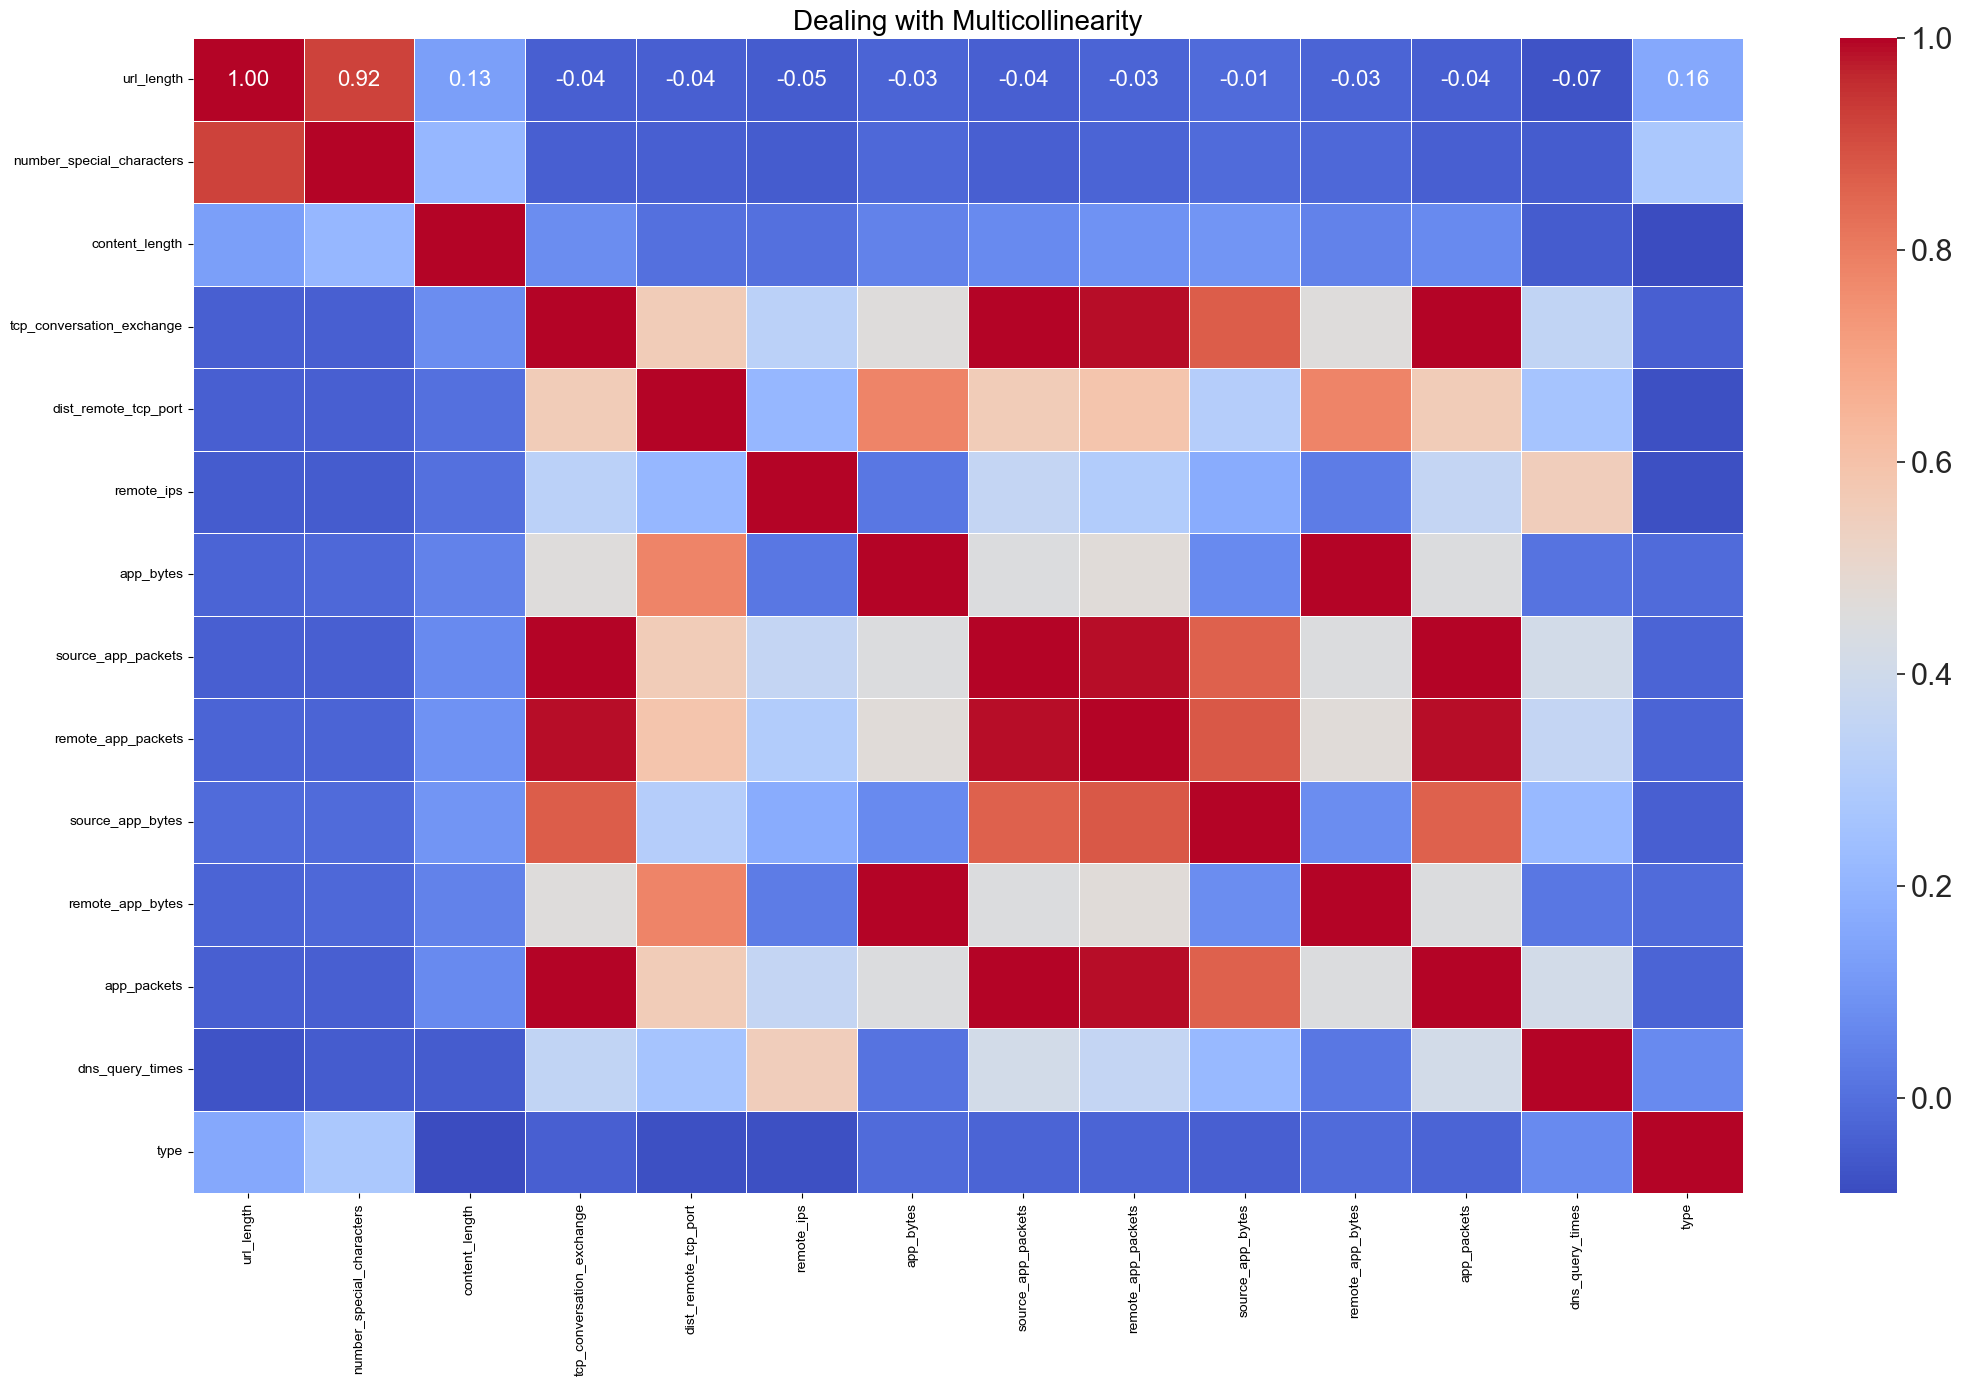

In [21]:
# creating a correlation heatmap for the correlation df
mask = np.zeros_like(websites_num_corr)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=2)
ax = sns.heatmap(websites_num_corr, mask=mask, annot=True, annot_kws={"size": 16}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Comments:

Unfortunately, my heatmaps still don't show any numbers. If I show the full heatmap, at least the first line is shown.

#### Findings on Correlation:

We have 4 combinations of features which show a correlation of over 0.9:
- 0.92: url_length vs. number_special_characters
- remote_app_packets shows a correlation of 0.99 with all the following 3 columns: tcp_conversation_exchange, source_app_packets, app_packets

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

### Comment:

I would first erase remote_app_packets because the number is already included in the feature tcp_conversation_exchange, so there is not much additional data here. Also, the feature is almost not at all correlated with the target. With dropping it, we would erase multicollinearity with three other features (which are also all almost not at all correlated with the target). 

In [25]:
websites_num.drop(columns="remote_app_packets", inplace=True)
websites_2 = websites.drop(columns="remote_app_packets") # creating a copy of the original df and dropping the column here as well (this df includes categorial data and might be needed for analysis)

In [26]:
websites_num_corr_2 = round(websites_num.corr(), 2)
websites_num_corr_2 # printing correlation df instead of heatmap because numbers are not shwn in heatmap

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url_length,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.01,-0.03,-0.04,-0.07,0.16
number_special_characters,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.04,-0.01,-0.02,-0.04,-0.05,0.28
content_length,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.07,0.10,0.05,0.07,-0.05,-0.09
tcp_conversation_exchange,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.87,0.46,1.00,0.35,-0.04
dist_remote_tcp_port,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.31,0.78,0.56,0.26,-0.08
remote_ips,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.17,0.03,0.36,0.55,-0.08
app_bytes,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.45,0.07,1.00,0.45,0.01,-0.01
source_app_packets,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.86,0.45,1.00,0.41,-0.03
source_app_bytes,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,1.00,0.08,0.86,0.22,-0.04
remote_app_bytes,-0.03,-0.02,0.05,0.46,0.78,0.03,1.00,0.45,0.08,1.00,0.45,0.02,-0.01


### Comment:

I will now remove url_length which has a very high correlation with number_special_characters but the latter has a higher correlation with the target.

In [28]:
websites_num.drop(columns="number_special_characters", inplace=True)
websites_2.drop(columns="number_special_characters", inplace=True)

In [29]:
websites_num_corr_3 = round(websites_num.corr(), 2)
websites_num_corr_3 # printing correlation df instead of heatmap because numbers are not shwn in heatmap

,url_length,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url_length,1.00,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.01,-0.03,-0.04,-0.07,0.16
content_length,0.13,1.00,0.08,-0.00,0.00,0.05,0.07,0.10,0.05,0.07,-0.05,-0.09
tcp_conversation_exchange,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.87,0.46,1.00,0.35,-0.04
dist_remote_tcp_port,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.31,0.78,0.56,0.26,-0.08
remote_ips,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.17,0.03,0.36,0.55,-0.08
app_bytes,-0.03,0.05,0.46,0.78,0.02,1.00,0.45,0.07,1.00,0.45,0.01,-0.01
source_app_packets,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.86,0.45,1.00,0.41,-0.03
source_app_bytes,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,1.00,0.08,0.86,0.22,-0.04
remote_app_bytes,-0.03,0.05,0.46,0.78,0.03,1.00,0.45,0.08,1.00,0.45,0.02,-0.01
app_packets,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.86,0.45,1.00,0.41,-0.03


### Comment:

The df is now cleaned from all multicollinearity > 0.9. Two columns had to be dropped to achieve this. Both of them were only very lowly (or almost not at all) correlated with the target "type".

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [32]:
# Your code here
websites_2.isna().sum()

url_length                     0
charset                        7
server                       176
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [34]:
# share of NaNs compared to overall
round(websites_2['content_length'].isna().mean(), 2)

0.46

In [35]:
websites_2.drop(columns="content_length", inplace=True)

### Comment:

- content_length showed a great deal of missing values (almost half of the values are NaNs).
- Also, the feature's correlation with the target is close to 0 (-0.09).
- For these two reasons, I decided to drop the whole column. 

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

### Comment:

- I believe this instruction to be only relevant for numerical data as the categorial data will be dealt with in the next section.
- For the numerical data, there is only one NaN left, in dns_query_times

In [39]:
websites_2.isna().sum()

url_length                     0
charset                        7
server                       176
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
dtype: int64

In [40]:
websites_2[websites_2['dns_query_times'].isna()]

,url_length,charset,server,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url,,,,,,,,,,,,,,,,,
B0_772,101,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,4,2,2,276,4,416,276,4,NaN,0


<Axes: xlabel='dns_query_times', ylabel='Count'>

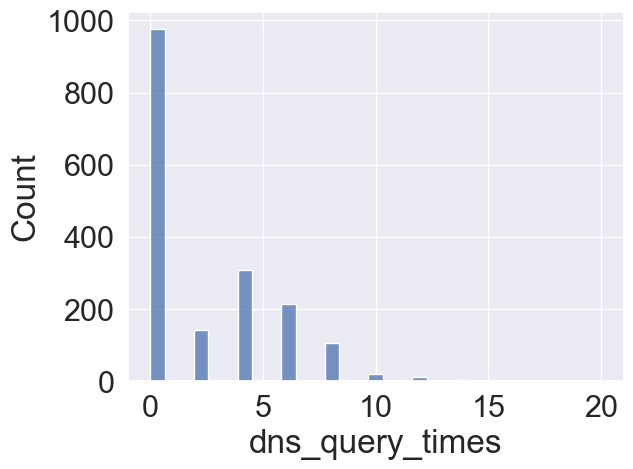

In [41]:
sns.histplot(websites_2['dns_query_times'])

In [42]:
websites_2['dns_query_times'].value_counts(ascending=False)

dns_query_times
0.00     976
4.00     309
6.00     213
2.00     142
8.00     105
10.00     19
12.00     12
14.00      2
20.00      1
9.00       1
Name: count, dtype: int64

In [43]:
websites_2['dns_query_times'].median()

0.0

In [44]:
websites_2['dns_query_times'] = websites_2['dns_query_times'].fillna(websites_2['dns_query_times'].median())

### Comment:

I decided to fill the NaN with the median (0) because this seems to be best for a discrete numerical feature which dns_query_times seems to be. These are the reasons:
- I don't want to change the dtype from int to float, so mean is no option.
- Also the median is more robust for outliers and the distribution in the feature is not normally distributed.
- The median keeps the central tendencies in the data.

Now, there is only NaNs left in features with dtype object

In [46]:
websites_2.isna().sum()

url_length                     0
charset                        7
server                       176
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                0
type                           0
dtype: int64

In [47]:
websites_2.dtypes

url_length                     int64
charset                       object
server                        object
whois_country                 object
whois_statepro                object
whois_regdate                 object
whois_updated_date            object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [50]:
websites_2.whois_country.unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [51]:
# first checking out whois_statepro for value "[u'GB'; u'UK']" in whois_country to find out whether it is GB or UK

websites_2[websites_2["whois_country"] == "[u'GB'; u'UK']"]

,url_length,charset,server,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url,,,,,,,,,,,,,,,,,
B0_1020,28,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,0,0,0,0,0,0,0,0,0.00,0
B0_2026,35,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,4,3,2,420,4,244,420,4,0.00,0
B0_2093,37,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,11,10,7,834,11,882,834,11,0.00,0
B0_1224,38,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,0,0,0,0,0,0,0,0,0.00,0
B0_1164,72,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,0,0,0,0,0,0,0,0,0.00,0


In [52]:
# as all values in state showed UK for unclear values in country, this will be changed accordingly

websites_2.whois_country = websites_2.whois_country.replace({"se": "SE",
                            "ru": "RU",
                            "us": "US",
                            "United Kingdom": "UK",
                            "Cyprus": "CY",
                            "[u'GB'; u'UK']": "UK"
                           })
websites_2.whois_country.unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [54]:
websites_2.whois_country.value_counts()

whois_country
US    1106
CA      84
ES      63
AU      35
PA      21
GB      19
UK      16
JP      11
CN      10
IN      10
FR       9
CZ       9
RU       6
CH       6
NL       6
KR       5
PH       4
AT       4
BS       4
SE       4
KY       3
SC       3
BE       3
TR       3
HK       3
DE       3
CY       2
UA       2
UY       2
KG       2
BR       2
NO       2
IL       2
SI       2
LV       1
PK       1
IT       1
LU       1
BY       1
AE       1
IE       1
UG       1
TH       1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [56]:
# defining the top 10
top_10 = websites_2["whois_country"].value_counts().nlargest(10).index
# new labels for categories not in top 10
websites_2["whois_country"] = websites_2["whois_country"].apply(lambda x: x if x in top_10 else "other")
websites_2["whois_country"].value_counts()

whois_country
US       1106
other     406
CA         84
ES         63
AU         35
PA         21
GB         19
UK         16
JP         11
IN         10
CN         10
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [58]:
websites_2.drop(columns=["whois_statepro", "whois_regdate", "whois_updated_date"], inplace=True)

In [59]:
websites_2.columns

Index(['url_length', 'charset', 'server', 'whois_country',
       'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips',
       'app_bytes', 'source_app_packets', 'source_app_bytes',
       'remote_app_bytes', 'app_packets', 'dns_query_times', 'type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [61]:
websites_2.dtypes

url_length                     int64
charset                       object
server                        object
whois_country                 object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

### Comment:

Already set as index

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

### Comment:

I do not agree, there should be some cleaning done here. I will change some labels before moving on because they the same categories but with slightly different labels.

In [66]:
websites_2.charset.value_counts()

charset
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [67]:
websites_2.charset = websites_2.charset.replace({"utf-8": "UTF-8",
                            "iso-8859-1": "ISO-8859-1"
                           })
websites_2.charset.unique()

array(['ISO-8859-1', 'UTF-8', 'us-ascii', nan, 'windows-1251', 'ISO-8859',
       'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

### Comment:

- These are different softwares for running a webserver. I would group them as Apache (ATS is also Apache), Microsoft, nginx, GSE (google), YouTube (or google?).
- So whenever one of the associated words with one system is shown, the value would be labeled as such, not regarding any subcategories of server edition etc.

In [70]:
websites_2.server.value_counts()[:30]

server
Apache                                                                                       386
nginx                                                                                        211
Microsoft-HTTPAPI/2.0                                                                        113
cloudflare-nginx                                                                              94
Microsoft-IIS/7.5                                                                             51
GSE                                                                                           49
Server                                                                                        49
YouTubeFrontEnd                                                                               42
nginx/1.12.0                                                                                  36
ATS                                                                                           30
Apache/2.2.15 (CentOS) 

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [73]:
def relabel_server(column):
    if pd.isna(column):
        return pd.NA

    
    if isinstance(column, str): # applying .lower() to string values only
        column = column.lower()

        if "apache" in column or "gse" in column or "ats" in column or "youtubefrontend" in column:
            return "Apache"
        elif "nginx" in column:
            return "nginx"
        elif "microsoft" in column:
            return "Microsoft"
    else:
        return "other"

websites_2["server"] = websites_2["server"].apply(relabel_server) # apply function

In [74]:
# Count `SERVER` value counts here
websites_2["server"].value_counts()

server
Apache       766
nginx        436
Microsoft    198
Name: count, dtype: int64

In [75]:
websites_2["server"].unique()

array(['nginx', 'Apache', 'Microsoft', <NA>, None], dtype=object)

In [76]:
websites_2.isna().sum()

url_length                     0
charset                        7
server                       381
whois_country                  0
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                0
type                           0
dtype: int64

### Comment:

- Just noticing: We still have NaNs in charset and in server.
- But I will ignore them for creating the dummies to improve the model

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [79]:
# Your code here
website_dummy = pd.concat([
    pd.get_dummies(websites_2["server"], prefix="server"),
    pd.get_dummies(websites_2["charset"], prefix="charset"),
    pd.get_dummies(websites_2["whois_country"], prefix="country")], axis=1)

website_dummy

,server_Apache,server_Microsoft,server_nginx,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_us-ascii,charset_windows-1251,charset_windows-1252,country_AU,country_CA,country_CN,country_ES,country_GB,country_IN,country_JP,country_PA,country_UK,country_US,country_other
url,,,,,,,,,,,,,,,,,,,,
M0_109,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
B0_2314,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
B0_911,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
B0_113,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
B0_403,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M4_48,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
M4_41,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
B0_162,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [81]:
# Your code here
website_dummy.dtypes

server_Apache           bool
server_Microsoft        bool
server_nginx            bool
charset_ISO-8859        bool
charset_ISO-8859-1      bool
charset_UTF-8           bool
charset_us-ascii        bool
charset_windows-1251    bool
charset_windows-1252    bool
country_AU              bool
country_CA              bool
country_CN              bool
country_ES              bool
country_GB              bool
country_IN              bool
country_JP              bool
country_PA              bool
country_UK              bool
country_US              bool
country_other           bool
dtype: object

In [82]:
websites_features = pd.concat([websites_2, website_dummy], axis=1) # concatenating both dfs
websites_features.drop(columns=["whois_country", "server", "charset"], inplace=True) # dropping columns which we now have dummies for
websites_features

,url_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type,server_Apache,server_Microsoft,server_nginx,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_us-ascii,charset_windows-1251,charset_windows-1252,country_AU,country_CA,country_CN,country_ES,country_GB,country_IN,country_JP,country_PA,country_UK,country_US,country_other
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M0_109,16,7,0,2,700,9,1153,832,9,2.00,1,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
B0_2314,16,17,7,4,1230,17,1265,1230,17,0.00,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
B0_911,16,0,0,0,0,0,0,0,0,0.00,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
B0_113,17,31,22,3,3812,39,18784,4380,39,8.00,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
B0_403,17,57,2,5,4278,61,129889,4586,61,4.00,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M4_48,194,0,0,0,0,0,186,0,0,0.00,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
M4_41,198,0,0,0,0,0,124,0,0,0.00,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
B0_162,201,83,2,6,6631,87,132181,6945,87,4.00,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [83]:
websites_features.dtypes # final checks

url_length                     int64
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
server_Apache                   bool
server_Microsoft                bool
server_nginx                    bool
charset_ISO-8859                bool
charset_ISO-8859-1              bool
charset_UTF-8                   bool
charset_us-ascii                bool
charset_windows-1251            bool
charset_windows-1252            bool
country_AU                      bool
country_CA                      bool
country_CN                      bool
country_ES                      bool
country_GB                      bool
country_IN                      bool
country_JP                      bool
c

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [85]:
from sklearn.model_selection import train_test_split

# Your code here:
X = websites_features.drop("type", axis=1)
y = websites_features["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [87]:
# Your code here:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [89]:
# Your code here:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'30% for test prediction data: {len(y_pred)}.')
print("")
print(classification_report(y_test, y_pred))

30% for test prediction data: 357.

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       308
           1       0.62      0.20      0.31        49

    accuracy                           0.87       357
   macro avg       0.76      0.59      0.62       357
weighted avg       0.85      0.87      0.85       357



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [91]:
print("Test data accuracy: ", model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.8739495798319328
Train data accuracy:  0.889747191011236


<Figure size 800x600 with 0 Axes>

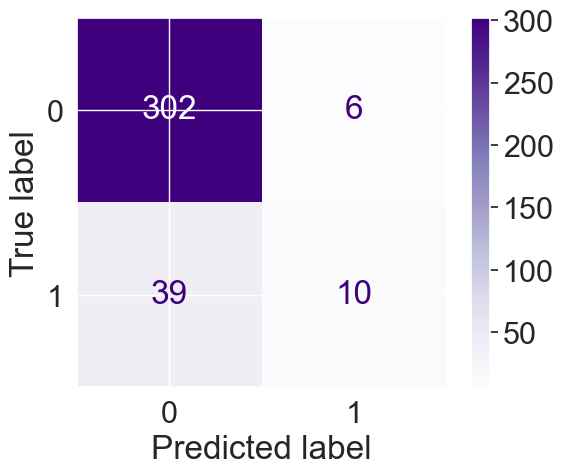

In [92]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

# Your conclusions here:

- The precision and recall rate for predicting benign websites are very good
- For malicious website they are not.
- Also, the confusion matrix shows this: 301 values were correctly identified as benign websites, only 12 were correctly identified as malicious.
- One reason is that there is much less data on malicious websites.
- Incorrectly identified as benign websites by the model were 37 values which is a lot, the error rate is high
- Incorrectly identifies as malicious were still 7 which is also not very little.

Overall, the model showed high error rates in predicting the nature of the website.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [96]:
# Your code here:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("")
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       308
           1       0.77      0.61      0.68        49

    accuracy                           0.92       357
   macro avg       0.85      0.79      0.82       357
weighted avg       0.92      0.92      0.92       357


Test data accuracy:  0.9215686274509803
Train data accuracy:  0.9592696629213483


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

<Figure size 800x600 with 0 Axes>

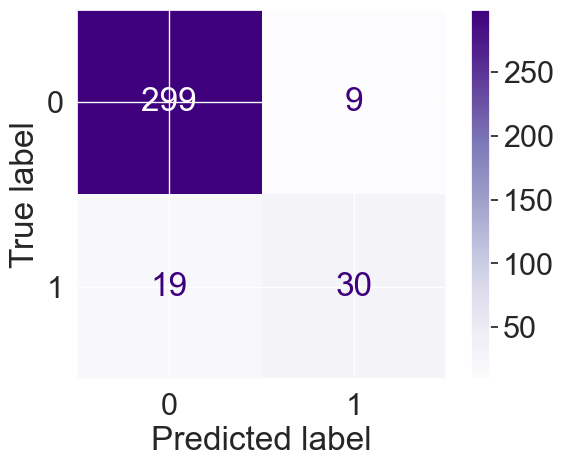

In [98]:
# Your code here:

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [100]:
# Your code here:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("")
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       308
           1       0.70      0.61      0.65        49

    accuracy                           0.91       357
   macro avg       0.82      0.79      0.80       357
weighted avg       0.91      0.91      0.91       357


Test data accuracy:  0.9103641456582633
Train data accuracy:  0.9550561797752809


<Figure size 800x600 with 0 Axes>

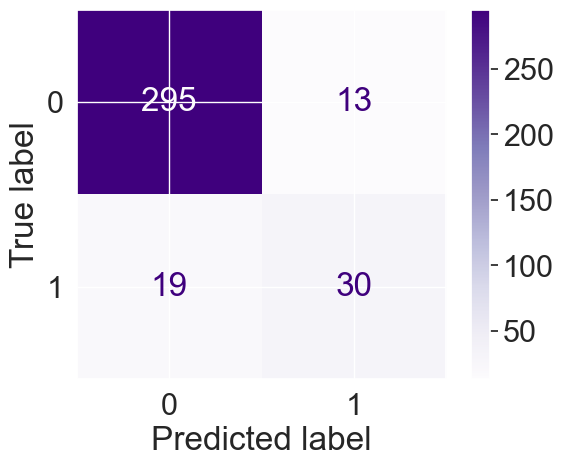

In [160]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

# Your conclusions here:

- The accuracy scores changed very little (went down the tiniest bit)
- predicting the benign webistes correctly imporoved at bit and incorrectly prediciting benign websites as malicious increased (=deteriorated).
- I would call predicting a malicious website as benign the worst mistake a model could make. So for this, the KNN models are much better then the logistic classification because the do this much less.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [91]:
# Your code here